In [1]:
import pandas as pd
from IPython.core.display import display, HTML
from sklearn.naive_bayes import MultinomialNB
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df=pd.read_csv('fake_or_real_news.csv')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/NBFakereviewRemoval/fake reviews dataset.csv')

In [4]:
df.tail()

,category,rating,label,text_
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,"I had read some reviews saying that this bra ran small and so I ordered TWO band AND cup sizes UP and it was still too small! Definitely along the lines of a sports bra squish effect. The sides do come up high. Glamorise is one the best brands for bras, so I'm very surprised with this one. The front close idea appealed to me, but look carefully, there are 7 (yes, seven) clasps to do up. What a pain. I think if I had ordered 3 sizes up it might be ok. I won't return it as I'm losing weight, so it might fit better down the road. Will update review at that time. If you want a bra that doesn't let you jiggle at all without it being a minimizer and/or without wires, this would be good.\n\nUPDATE: After very recent gallbladder surgery that left me with a highly tender incision site, I found I couldn't wear any of my regular bras. I had ordered this one hoping I might be able to tolerate it. Initially, because it was so tight, I couldn't tolerate this one either. As I slowly healed, I kept trying the bra. Due to its elastic nature I was able to adjust this for comfort more than the others. After about two weeks, much to my amazement, I found the bra had lost its initial snugness and was in fact VERY comfortable! 5 weeks after surgery and this is still the only bra I can tolerate. The number of clasps in the front turned out to be a bonus as well, because I could choose to leave the bottom clasps undone, adding to the comfort level. I am still of the opinion that it runs too snug and I'm glad I ordered up.\n\nTake the time to break the bra in! All bras have a break-in period (in my opinion), and this one is no different. I'm actually quite happy with it now."
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,"I wasn't sure exactly what it would be. It is a little large for my small size, but I think it is a nice fit. The fabric is a nice thin material, but it is a little thin in the legs. I wish it was thicker. The material is soft and comfortable. I will keep it. I ordered a half size up and it fits great. I wear a 9 1/2. I like that the strap is longer than the waistband, which is nice. I am 5'5"" and the size 6 fits great. I am a medium. The bra is too short. It is a little narrow for me, but I think it would be a nice addition to my wardrobe. I will be buying another one in different colors. I have a small tummy and I ordered a medium. I wear a 9 1/2 in pants. I would recommend this bra. I am 5'8"" and the length was perfect. I love the color and it is very comfortable.\nI would recommend this to anyone.I was very happy with this shirt! It's very pretty and the fabric is soft and nice! The fit is perfect! I bought a small and it fit perfectly! It is well made and it's very comfortable.I like the leggings but they are not as comfortable. I am a 36D and ordered a medium and it was too big. I am going to return it. I returned it. I am very pleased with this purchase and will be ordering another one.I bought these shoes to wear to work when I was out walking in the rain."
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with the hood, or wear just the jacket without the hood. How is that for 3-in-1 systems?\n\nReminiscent of what Lands End sells as a ""Squall Jacket"", or what uniform and corporate wear sellers call a Three Season Jacket.\n\nWater and wind resistant shell. Microfleece lined body. Smooth polyester lining in sleeves. Left hand side, Napoleon style, inside pocket with a hook and loop closure. Adjustable sleeve cuffs. Hemline cinch cord with toggles. Molded plastic chain style, off brand, slide fastener.\n\nPolyester insulation is spilling out due to poor quality stitching. Item was delivered with a broken main zipper.\n\nI can wear this jacket over just a t-shirt, and expect to stay warm @ 72 degrees Fahrenheit, and no wind.\n\nIf it was foggy, or there's a light drizzle, I would have no problem depending on this jacket to 

In [5]:
df["label"].unique()
#CG : fake
#OR : original

array(['CG', 'OR'], dtype=object)

In [ ]:
df.head()

Unnamed: 0  \
0  8476         
1  10294        
2  3608         
3  10142        
4  875          

                                                                                   title  \
0  You Can Smell Hillary’s Fear                                                            
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   
2  Kerry to go to Paris in gesture of sympathy                                             
3  Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'    
4  The Battle of New York: Why This Primary Matters                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [6]:
df.count()

category    40432
rating      40432
label       40432
text_       40432
dtype: int64

In [7]:
fake_set = df.loc[df['label'] == 'CG']
#fake_set = df.loc[df['label']]
real_set = df.loc[df['label'] == 'OR']
#real_set = df.loc[df['label']]
print(fake_set.count())
print(real_set.count())

category    20216
rating      20216
label       20216
text_       20216
dtype: int64
category    20216
rating      20216
label       20216
text_       20216
dtype: int64


In [8]:
train_set = pd.concat([fake_set[0:14152],real_set[0:14152]])
test_set = pd.concat([fake_set[14153:],real_set[14153:]])
print(train_set.head())

             category  rating label  \
0  Home_and_Kitchen_5  5.0     CG     
1  Home_and_Kitchen_5  5.0     CG     
2  Home_and_Kitchen_5  5.0     CG     
3  Home_and_Kitchen_5  1.0     CG     
4  Home_and_Kitchen_5  5.0     CG     

                                                                                   text_  
0  Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty            
1  love it, a great upgrade from the original.  I've had mine for a couple of years       
2  This pillow saved my back. I love the look and feel of this pillow.                    
3  Missing information on how to use it, but it is a great product for the price!  I      
4  Very nice set. Good quality. We have had the set for two months now and have not been  


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=2000000, stop_words='english', min_df=0.002, max_df=0.95, 
                                   use_idf=True, ngram_range=(1,3))

In [10]:
from sklearn.feature_selection import SelectKBest, chi2
tv = tfidf_vectorizer.fit(train_set['text_'])
%time train_tfidf_matrix = tv.transform(train_set['text_'])
ch2 = SelectKBest(chi2, k='all')
train_set_selected = ch2.fit_transform(train_tfidf_matrix, train_set['label'])

CPU times: user 2.73 s, sys: 5.09 ms, total: 2.73 s
Wall time: 2.74 s


In [11]:
%time model1 = MultinomialNB().fit(train_tfidf_matrix, train_set['label'])
%time model2 = MultinomialNB().fit(train_set_selected, train_set['label'])

CPU times: user 88.8 ms, sys: 932 µs, total: 89.7 ms
Wall time: 91.7 ms
CPU times: user 84.7 ms, sys: 1.03 ms, total: 85.7 ms
Wall time: 84.2 ms


In [12]:
test_tfidf_matrix = tv.transform(test_set['text_'])
test_set_selected = ch2.transform(test_tfidf_matrix)

In [13]:
all_predictions1 = model1.predict(test_tfidf_matrix)
all_predictions2 = model2.predict(test_set_selected)

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('accuracy of model1 {}'.format(accuracy_score(test_set['label'], all_predictions1)))
print('accuracy of model2 {}'.format(accuracy_score(test_set['label'], all_predictions2)))


accuracy of model1 0.7827808015833746
accuracy of model2 0.7827808015833746


In [15]:
import pickle

filename = 'fakeReviews.pkl'
pickle.dump(model1, open(filename, 'wb'))

pickle.dump(tv, open("countVector.pkl", 'wb'))

In [16]:
vec = pickle.load(open("/content/countVector.pkl", "rb"))
sentiment_model = pickle.load(open("/content/fakeReviews.pkl", "rb"))

In [23]:
sdf = vec.transform(["Love this!  Well made, sturdy, and very comfortable.I love it!Very pretty"]).reshape(1, -1)
sentiment = sentiment_model.predict(sdf)

In [24]:
sentiment

array(['CG'], dtype='<U2')

In [ ]:
sample_review = [r"I work in the wedding industry and have to work long days, on my feet, outside in the heat, and have to look professional. I've spent a ridiculous amount of money on high end dress shoes like Merrels and just have not been able to find a pair that are comfortable to wear all day. Both for my feet and my back. Enter the Sanuk yoga sling!!! These shoes are amazingly comfortable. Though, I will admit it took a few wears to get used to the feel of the yoga matte bottom. At first, it felt a little sticky to me, and the fabric part that goes through the toe area was a little thick and took some getting used to. I wore them for a few days before taking them out on a job and I can't get over how comfortable they are. Ii have been wearing these shoes now for 3 months, every work day and I am THRILLED. No more back pain, no more sore feet. I also wear these sometimes during my off time,mans every time I wear them, I get compliments on how cute and comfortable they look. The great thing about these shoes is the yoga matte bottom. It helps your feet grip to the shoe a bit, so your foot can just walk normally, without having to grip the shoe. You may not realize it, but with a lot of Sandals, your foot is having to work to keep the shoe on, changing the way you walk and stand and ultimately causing foot and back pain. Not with these! Also, the soft linen sits comfortably on your skin and breathes nicely in the heat. The only downside is the funky tan lines, which is why I am sure to alternate shoes on my days off, especially if I plan to be outside for most of the day. If it were not for that, I think these might be the only shoes I'd wear all summer. If you are looking for a reasonable priced, comfortable shoe that you can wear and walk in all day"]
r_tf_idf = tv.transform(sample_review)

In [ ]:
r_tf_idf

<1x2420 sparse matrix of type '<class 'numpy.float64'>'
	with 70 stored elements in Compressed Sparse Row format>

In [ ]:
# load the model from disk
vec = pickle.load(open("my_count_vec.pkl", "rb"))
loaded_model = pickle.load(open('/content/fakeReviews.sav', 'rb'))
result = loaded_model.predict(r_tf_idf)
print(result)

['OR']


              precision    recall  f1-score   support

          CG       0.84      0.70      0.76      6063
          OR       0.74      0.86      0.80      6063

    accuracy                           0.78     12126
   macro avg       0.79      0.78      0.78     12126
weighted avg       0.79      0.78      0.78     12126



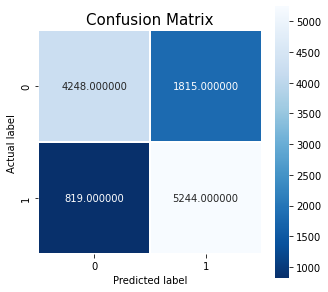

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set['label'],all_predictions1)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

from sklearn.metrics import classification_report
report = classification_report(test_set['label'],all_predictions1)
print(report)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer( max_features=200000, stop_words='english', min_df=0.002, max_df=0.5, ngram_range=(1,3))
count_vectorizer = count_vectorizer.fit(train_set['text_'])
%time train_count_matrix = count_vectorizer.transform(train_set['text_'])

CPU times: user 2.5 s, sys: 2.72 ms, total: 2.5 s
Wall time: 2.5 s


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
top = SelectKBest(chi2, k='all')
train_set_selected2 = top.fit_transform(train_count_matrix, train_set['label'])

In [ ]:
%time model2 = MultinomialNB().fit(train_set_selected2, train_set['label'])

CPU times: user 83.9 ms, sys: 2.97 ms, total: 86.8 ms
Wall time: 86.6 ms


In [ ]:
test_count_matrix = count_vectorizer.transform(test_set['text_'])
test_set_selected2 = top.transform(test_count_matrix)
all_predictions2 = model2.predict(test_set_selected2)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('accuracy {}'.format(accuracy_score(test_set['label'], all_predictions2)))
print('confusion matrix\n {}'.format(confusion_matrix(test_set['label'], all_predictions2)))
print('(row=expected, col=predicted)')

accuracy 0.7696684809500247
confusion matrix
 [[4342 1721]
 [1072 4991]]
(row=expected, col=predicted)


In [ ]:
plt.matshow(confusion_matrix(test_set['label'], all_predictions2), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

             precision    recall  f1-score   support

       FAKE       0.90      0.90      0.90       964
       REAL       0.90      0.90      0.90       971

avg / total       0.90      0.90      0.90      1935



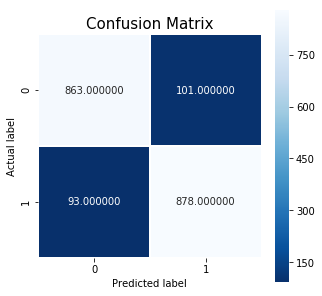

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set['label'],all_predictions2)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

from sklearn.metrics import classification_report
report = classification_report(test_set['label'],all_predictions2)
print(report)
